<div class="alert alert-block alert-info"><font size="6"><b>Sprint 6 Task 1 (S06_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the mode, median, standard deviation, and arithmetic mean.</SPAN>

To solve this practice we start by **importing** all the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics

For this practice, I'm going to use data from the ATP (Association of Professional Tennis) matches from the year 2018, the same one I used for Sprint 5.   
In this data set, the winner and loser are coded with an ID. We have another dataset that references this ID with player information.

For the matches dataset we have the following column reference:
* ace = absolute number of aces  
* df = number of double faults  
* svpt = total serve points  
* 1stin = 1st serve in  
* 1stwon = points won on 1st serve  
* 2ndwon = points won on 2nd serve  
* SvGms = serve games  
* bpSaved = break point saved  
* bpFaced = break point faced  

source: https://www.kaggle.com/datasets/pablodroca/atp-tennis-matches-20002019?select=atp_matches_2019.csv

In [2]:
ranking = pd.read_csv('atp_matches_2018.csv') # matches 2018
players = pd.read_csv('atp_players.csv') # players information

In [3]:
pd.set_option('display.max_columns', 50)
ranking.sample(5)

,tourney_id,tourney_name,tourney_date,surface,winner_id,loser_id,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
183,2018-580,Australian Open,20180115,Hard,111202,104999,6-2 4-1 RET,5,R128,48.0,3.0,2.0,35.0,21.0,17.0,9.0,6.0,3.0,3.0,1.0,3.0,45.0,33.0,15.0,6.0,7.0,2.0,6.0,58.0,857.0,35.0,1302.0
2768,2018-0328,Basel,20181022,Hard,104468,105208,7-6(4) 7-6(0),3,R16,136.0,4.0,4.0,76.0,38.0,31.0,23.0,12.0,2.0,3.0,9.0,4.0,106.0,54.0,35.0,27.0,12.0,12.0,13.0,32.0,1290.0,104.0,566.0
2734,2018-0429,Stockholm,20181015,Hard,104259,104269,4-6 7-5 7-6(5),3,R16,165.0,10.0,0.0,112.0,67.0,53.0,26.0,17.0,8.0,10.0,11.0,6.0,126.0,69.0,51.0,29.0,17.0,10.0,12.0,35.0,1215.0,29.0,1455.0
2045,2018-0319,Kitzbuhel,20180730,Clay,104797,104259,5-7 6-3 6-1,3,R16,129.0,6.0,6.0,93.0,64.0,44.0,15.0,14.0,5.0,7.0,3.0,7.0,91.0,48.0,26.0,26.0,14.0,4.0,9.0,95.0,597.0,29.0,1475.0
92,2018-0301,Auckland,20180108,Hard,105449,132482,7-5 7-6(4),3,R32,104.0,12.0,1.0,78.0,43.0,34.0,22.0,12.0,4.0,5.0,7.0,1.0,78.0,40.0,31.0,20.0,12.0,2.0,4.0,46.0,1055.0,397.0,100.0


In [4]:
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2889 non-null   object 
 1   tourney_name        2889 non-null   object 
 2   tourney_date        2889 non-null   int64  
 3   surface             2889 non-null   object 
 4   winner_id           2889 non-null   int64  
 5   loser_id            2889 non-null   int64  
 6   score               2889 non-null   object 
 7   best_of             2889 non-null   int64  
 8   round               2889 non-null   object 
 9   minutes             2854 non-null   float64
 10  w_ace               2863 non-null   float64
 11  w_df                2863 non-null   float64
 12  w_svpt              2863 non-null   float64
 13  w_1stIn             2863 non-null   float64
 14  w_1stWon            2863 non-null   float64
 15  w_2ndWon            2863 non-null   float64
 16  w_SvGm

In [5]:
players.head()

,player_id,name_first,name_list,hand,birthdate,country
0,100001,Gardnar,Mulloy,R,19131122.0,USA
1,100002,Pancho,Segura,R,19210620.0,ECU
2,100003,Frank,Sedgman,R,19271002.0,AUS
3,100004,Giuseppe,Merlo,R,19271011.0,ITA
4,100005,Richard Pancho,Gonzales,R,19280509.0,USA


In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54067 entries, 0 to 54066
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   player_id   54067 non-null  int64  
 1   name_first  53890 non-null  object 
 2   name_list   54025 non-null  object 
 3   hand        48289 non-null  object 
 4   birthdate   43099 non-null  float64
 5   country     54067 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ MB


I want to merge both dataframes in order to replace in **matches** the **winner_id** and **loser_id** with actual name and contry from **players**.

In [7]:
# new column for players with joined name

players['player'] =  players ['name_list'] + ', ' + players['name_first']

In [8]:
# merge dataframes, first winner and then loser

winners = pd.merge(ranking, players.loc[:, ['player_id', 'country', 'player']], 
                 left_on=['winner_id'], right_on=['player_id']).drop(columns = ['winner_id', 'player_id'])

atp_2018 = pd.merge(winners, players.loc[:, ['player_id', 'country', 'player']], how= 'inner', 
                  left_on=['loser_id'], right_on=['player_id']).drop(columns = ['loser_id', 'player_id'])

In [9]:
# reorder and rename columns

atp_2018 = atp_2018[['tourney_id', 'tourney_name', 'tourney_date', 'surface', 'player_x', 'country_x',  'player_y', 
                 'country_y', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 
                 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 
                 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points', 
                 'loser_rank', 'loser_rank_points']]

atp_2018.rename(columns={'player_x': 'winner', 'country_x': 'country_winner', 
                       'player_y': 'loser', 'country_y': 'country_loser' }, inplace=True)

In [10]:
atp_2018.head()

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,20180101,Hard,"Harrison, Ryan",USA,"Mayer, Leonardo",ARG,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-6242,Winston Salem,20180820,Hard,"Edmund, Kyle",GBR,"Mayer, Leonardo",ARG,6-3 6-3,3,R32,72.0,3.0,3.0,47.0,29.0,27.0,10.0,9.0,0.0,0.0,7.0,5.0,54.0,31.0,24.0,8.0,9.0,2.0,5.0,16.0,1985.0,41.0,1061.0
2,2018-M016,Eastbourne,20180625,Grass,"Millman, John",AUS,"Mayer, Leonardo",ARG,7-6(7) 7-6(4),3,R16,121.0,3.0,1.0,83.0,58.0,39.0,16.0,12.0,6.0,8.0,5.0,2.0,93.0,53.0,39.0,18.0,12.0,5.0,7.0,62.0,906.0,36.0,1227.0
3,2018-M007,Miami Masters,20180319,Hard,"Coric, Borna",CRO,"Mayer, Leonardo",ARG,6-7(5) 6-3 6-4,3,R64,176.0,5.0,4.0,112.0,70.0,56.0,20.0,16.0,8.0,9.0,10.0,8.0,107.0,54.0,42.0,25.0,15.0,4.0,7.0,36.0,1366.0,45.0,1080.0
4,2018-0414,Hamburg,20180723,Clay,"Basilashvili, Nikoloz",RUS,"Mayer, Leonardo",ARG,6-4 0-6 7-5,3,F,132.0,4.0,8.0,90.0,42.0,33.0,23.0,14.0,6.0,9.0,9.0,4.0,87.0,57.0,45.0,12.0,14.0,2.0,4.0,81.0,715.0,36.0,1197.0


In [11]:
atp_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 2888
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          2889 non-null   object 
 1   tourney_name        2889 non-null   object 
 2   tourney_date        2889 non-null   int64  
 3   surface             2889 non-null   object 
 4   winner              2889 non-null   object 
 5   country_winner      2889 non-null   object 
 6   loser               2889 non-null   object 
 7   country_loser       2889 non-null   object 
 8   score               2889 non-null   object 
 9   best_of             2889 non-null   int64  
 10  round               2889 non-null   object 
 11  minutes             2854 non-null   float64
 12  w_ace               2863 non-null   float64
 13  w_df                2863 non-null   float64
 14  w_svpt              2863 non-null   float64
 15  w_1stIn             2863 non-null   float64
 16  w_1stW

Now we have the dataframe as we wanted it!! Let's do the **mode, median, standard deviation, and arithmetic mean** for the number of aces per minute from the winner of the match, It will be new column **w_ace/hour** (since we have matches "to the best of 3 games" and "to the best of 5 games").

Let's see about **NaN** values in **w_ace** and **minutes** columns:

In [12]:
atp_2018[atp_2018['w_ace'].isnull() | atp_2018['minutes'].isnull()]

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
61,2018-M001,Sydney,20180108,Hard,"Medvedev, Daniil",RUS,"De Minaur, Alex",AUS,1-6 6-4 7-5,3,F,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,642.0,167.0,323.0
276,2018-5014,Shanghai Masters,20181008,Hard,"Cecchinato, Marco",ITA,"Chung, Hyeon",KOR,4-6 7-6(5) 7-6(5),3,R32,NaN,7.0,2.0,113.0,85.0,58.0,16.0,17.0,4.0,8.0,6.0,0.0,109.0,84.0,57.0,15.0,17.0,2.0,5.0,21.0,1768.0,26.0,1630.0
301,2018-5014,Shanghai Masters,20181008,Hard,"Bautista Agut, Roberto",ESP,"Mcdonald, Mackenzie",USA,3-6 6-4 6-1,3,R32,NaN,4.0,2.0,74.0,54.0,41.0,8.0,13.0,3.0,6.0,5.0,3.0,83.0,59.0,39.0,8.0,13.0,8.0,13.0,28.0,1570.0,78.0,701.0
309,2018-6242,Winston Salem,20180820,Hard,"Harrison, Ryan",USA,"Simon, Gilles",FRA,W/O,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,955.0,39.0,1080.0
392,2018-5014,Shanghai Masters,20181008,Hard,"Zverev, Alexander",GER,"Basilashvili, Nikoloz",RUS,7-5 6-4,3,R32,NaN,12.0,0.0,63.0,43.0,36.0,9.0,11.0,4.0,5.0,9.0,5.0,73.0,46.0,32.0,12.0,11.0,7.0,10.0,5.0,4755.0,23.0,1757.0
395,2018-M-DC-2018-G2-EPA-M-GEO-MAR-01,Davis Cup G2 R1: GEO vs MAR,20180203,Clay,"Ouahab, Lamine",ALG,"Basilashvili, Nikoloz",RUS,6-1 6-3,3,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,591.0,49.0,57.0,916.0
456,2018-M006,Indian Wells Masters,20180305,Hard,"Raonic, Milos",CAN,"Baghdatis, Marcos",CYP,W/O,3,R16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,1270.0,102.0,564.0
498,2018-5014,Shanghai Masters,20181008,Hard,"Querrey, Sam",USA,"Fritz, Taylor Harry",USA,6-3 6-7(4) 7-5,3,R32,NaN,13.0,3.0,104.0,71.0,58.0,16.0,17.0,3.0,4.0,12.0,3.0,95.0,61.0,42.0,21.0,16.0,1.0,4.0,57.0,920.0,59.0,858.0
640,2018-5014,Shanghai Masters,20181008,Hard,"Edmund, Kyle",GBR,"Seppi, Andreas",ITA,6-3 6-4,3,R32,NaN,8.0,1.0,62.0,43.0,33.0,10.0,10.0,3.0,4.0,3.0,2.0,62.0,39.0,28.0,9.0,9.0,3.0,6.0,14.0,1990.0,47.0,1021.0
727,2018-0311,London,20180618,Grass,"Lopez, Feliciano",ESP,"Raonic, Milos",CAN,W/O,3,R16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,1190.0,31.0,1405.0


Half of these rows are W/O (walk over) matches in **score** column. This means matches that have not been played or finished early due to some problem.
Some other rows are from matches in early stages of the tournament where no data has been collected. We could fill these NaN values with the mean from the rest, but early stages of a tournament indicates """""not so good players""""" (among a lot of quotes) and it might not be a good idea to replace them with the average aces of winners in advenced stages of the tournament.
Both these rows are missing **w_ace** and **minutes** data.

Conclusion: I'll drop these rows and the remaing ones were only the **minutes** are missing I will fill them with mean. In this case only in matches "to the best of three" are missing the minutes.

In [13]:
atp_2018.dropna(subset = ['w_ace'], how = 'any', inplace = True) # rows with NaN values in -w_ace- column

In [14]:
atp_2018[atp_2018['w_ace'].isnull() | atp_2018['minutes'].isnull()] # rows with NaN in -minutes- column

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
276,2018-5014,Shanghai Masters,20181008,Hard,"Cecchinato, Marco",ITA,"Chung, Hyeon",KOR,4-6 7-6(5) 7-6(5),3,R32,NaN,7.0,2.0,113.0,85.0,58.0,16.0,17.0,4.0,8.0,6.0,0.0,109.0,84.0,57.0,15.0,17.0,2.0,5.0,21.0,1768.0,26.0,1630.0
301,2018-5014,Shanghai Masters,20181008,Hard,"Bautista Agut, Roberto",ESP,"Mcdonald, Mackenzie",USA,3-6 6-4 6-1,3,R32,NaN,4.0,2.0,74.0,54.0,41.0,8.0,13.0,3.0,6.0,5.0,3.0,83.0,59.0,39.0,8.0,13.0,8.0,13.0,28.0,1570.0,78.0,701.0
392,2018-5014,Shanghai Masters,20181008,Hard,"Zverev, Alexander",GER,"Basilashvili, Nikoloz",RUS,7-5 6-4,3,R32,NaN,12.0,0.0,63.0,43.0,36.0,9.0,11.0,4.0,5.0,9.0,5.0,73.0,46.0,32.0,12.0,11.0,7.0,10.0,5.0,4755.0,23.0,1757.0
498,2018-5014,Shanghai Masters,20181008,Hard,"Querrey, Sam",USA,"Fritz, Taylor Harry",USA,6-3 6-7(4) 7-5,3,R32,NaN,13.0,3.0,104.0,71.0,58.0,16.0,17.0,3.0,4.0,12.0,3.0,95.0,61.0,42.0,21.0,16.0,1.0,4.0,57.0,920.0,59.0,858.0
640,2018-5014,Shanghai Masters,20181008,Hard,"Edmund, Kyle",GBR,"Seppi, Andreas",ITA,6-3 6-4,3,R32,NaN,8.0,1.0,62.0,43.0,33.0,10.0,10.0,3.0,4.0,3.0,2.0,62.0,39.0,28.0,9.0,9.0,3.0,6.0,14.0,1990.0,47.0,1021.0
779,2018-5014,Shanghai Masters,20181008,Hard,"De Minaur, Alex",AUS,"Paire, Benoit",FRA,6-4 6-3,3,R32,NaN,2.0,2.0,75.0,54.0,36.0,11.0,10.0,6.0,7.0,1.0,0.0,60.0,27.0,18.0,16.0,9.0,3.0,6.0,33.0,1238.0,62.0,850.0
1057,2018-5014,Shanghai Masters,20181008,Hard,"Anderson, Kevin",RSA,"Kukushkin, Mikhail",KAZ,6-3 6-2,3,R32,NaN,14.0,3.0,45.0,31.0,27.0,9.0,9.0,0.0,0.0,1.0,2.0,51.0,32.0,15.0,12.0,8.0,0.0,3.0,8.0,3640.0,83.0,686.0
1476,2018-5014,Shanghai Masters,20181008,Hard,"Federer, Roger",SUI,"Medvedev, Daniil",RUS,6-4 4-6 6-4,3,R32,NaN,10.0,0.0,86.0,61.0,50.0,9.0,15.0,1.0,3.0,5.0,3.0,101.0,66.0,42.0,19.0,15.0,4.0,7.0,2.0,6900.0,22.0,1762.0
1729,2018-5014,Shanghai Masters,20181008,Hard,"Del Potro, Juan Martin",ARG,"Gasquet, Richard",FRA,7-5 7-6(7),3,R32,NaN,9.0,2.0,79.0,53.0,41.0,13.0,12.0,0.0,1.0,12.0,0.0,77.0,60.0,44.0,8.0,12.0,1.0,3.0,4.0,6130.0,25.0,1670.0
2472,2018-5014,Shanghai Masters,20181008,Hard,"Tsitsipas, Stefanos",GRE,"Khachanov, Karen",RUS,6-4 7-6(8),3,R32,NaN,6.0,2.0,73.0,49.0,40.0,11.0,11.0,3.0,4.0,5.0,0.0,75.0,50.0,41.0,11.0,11.0,2.0,4.0,15.0,1987.0,27.0,1605.0


In [15]:
grouped_mins = atp_2018.groupby('best_of')['minutes'].mean() # excluding missing values by default
grouped_mins

best_of
3     99.371666
5    156.341593
Name: minutes, dtype: float64

In [16]:
mean_bo3 = round(grouped_mins.loc[3,], 2) # minutes average for matches "to the best of 3"
atp_2018['minutes'].fillna(value = mean_bo3, inplace=True)

In [17]:
atp_2018[atp_2018['w_ace'].isnull() | atp_2018['minutes'].isnull()]

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points


I will round the new **aces** column without decimals to have a useful **mode** value. Otherwise, the mode would be 0 since the variable **minutes** is a continuous with no repeatability. Let's see:

In [18]:
atp_2018['aces'] = (atp_2018['w_ace'] * 60) / atp_2018['minutes'] # new column in hours!

atp_2018.groupby('aces')['minutes'].count()

aces
0.000000     91
0.270270      1
0.298507      1
0.306122      1
0.312500      1
             ..
19.245283     1
19.830508     1
20.210526     1
21.428571     1
22.352941     1
Name: minutes, Length: 1177, dtype: int64

In [19]:
atp_2018['aces'] = round(atp_2018['aces'], 0) # rounded

In [20]:
atp_2018[atp_2018['aces'].isnull()] # check if there are any NaN values in new column (they shouldn't)

,tourney_id,tourney_name,tourney_date,surface,winner,country_winner,loser,country_loser,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,aces


In [21]:
atp_2018.sample(10)
atp_2018.to_csv('atp_2018.csv', index = False) # save csv with data handling

<u>**Mode:**</u> the value or values that occurs most often.

In [22]:
w_ace_mode = atp_2018.aces.mode()
print(f"Aces from winner mode is {w_ace_mode[0]} per hour of match")

Aces from winner mode is 2.0 per hour of match


In [23]:
atp_2018.groupby('aces')['minutes'].count()

aces
0.0     137
1.0     353
2.0     488
3.0     441
4.0     361
5.0     293
6.0     225
7.0     164
8.0     116
9.0      77
10.0     64
11.0     45
12.0     30
13.0     22
14.0     19
15.0     10
16.0      8
17.0      3
18.0      2
19.0      1
20.0      2
21.0      1
22.0      1
Name: minutes, dtype: int64

<u>**Median:**</u> the "middle" of a sorted list of numbers.

In [24]:
w_ace_median = round(atp_2018.aces.median(), 2)
print(f"Aces from winner median is {w_ace_median} per hour of match")

Aces from winner median is 4.0 per hour of match


<u>**Standard Deviation:**</u> a measure of how spread out numbers are.

In [25]:
w_ace_sd = round(atp_2018.aces.std(), 2)
print(f'Aces from winner standard deviation is {w_ace_sd} per hour of match')

Aces from winner standard deviation is 3.17 per hour of match


<u>**Arithmetic Mean:**</u> the average of the numbers.

In [26]:
w_ace_mean = round(atp_2018.aces.mean(), 2)
print(f'Aces from winner mean is {w_ace_mean} per hour of match')

Aces from winner mean is 4.26 per hour of match


In [27]:
atp_2018.aces.describe()

count    2863.000000
mean        4.259169
std         3.168994
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        22.000000
Name: aces, dtype: float64

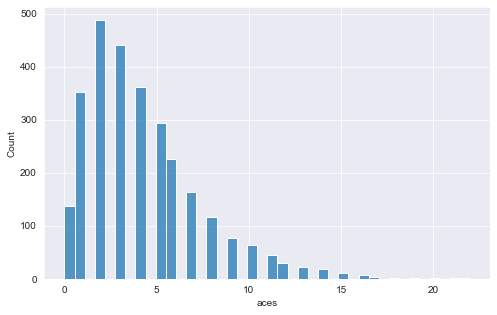

In [28]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 5))
sns.histplot(data = atp_2018, x = 'aces')
plt.show()

### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Continuing with the sports topic data, select two attributes and calculate their correlation.</SPAN>

For this practice we are going to study if there is a linear correlation between **w_1stin** (if the match winner's first serve is in) and **w_1stwon** (if the match winner wins the points when his first serve is in).

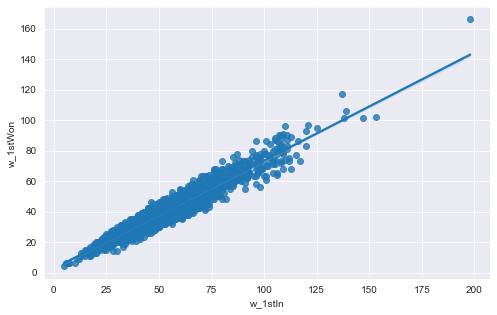

In [29]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize = (8, 5))
sns.regplot(data = atp_2018, x = 'w_1stIn', y = 'w_1stWon')
plt.show()

In [30]:
corr_1serve = round(atp_2018['w_1stIn'].corr(atp_2018.w_1stWon),2)
print(f'Correlation is = {corr_1serve}')

Correlation is = 0.96


We have a strong correlation between these two variables as expected.

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 3</SPAN>

<SPAN style=color:#1F618D>Continue with the sports theme data and calculate the correlation of all the attributes with each other and represent them in a matrix with different colors of intensity.</SPAN>

In [31]:
m_corr = atp_2018.corr()
m_corr

,tourney_date,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,aces
tourney_date,1.000000,-0.008574,-0.012827,0.056677,-0.020459,-0.018216,-0.020190,-0.000830,0.005194,-0.000169,-0.036452,-0.047810,0.055314,0.026738,-0.008925,-0.014529,0.012592,0.003595,-0.005731,-0.017603,-0.046112,-0.122711,0.082659,-0.100999,0.107870,0.079191
best_of,-0.008574,1.000000,0.539414,0.304515,0.276776,0.535535,0.516630,0.544029,0.455529,0.613999,0.227174,0.264494,0.225535,0.278739,0.575630,0.533555,0.467438,0.433885,0.599869,0.312247,0.430731,-0.102684,0.162423,-0.041247,0.020397,0.033950
minutes,-0.012827,0.539414,1.000000,0.332365,0.437339,0.931744,0.879850,0.851796,0.744651,0.916823,0.504969,0.607579,0.445721,0.346973,0.927772,0.876322,0.861621,0.781837,0.917922,0.439936,0.442988,-0.047692,0.044151,-0.096548,0.123315,-0.159249
w_ace,0.056677,0.304515,0.332365,1.000000,0.253984,0.402197,0.409156,0.531201,0.298220,0.468578,0.054797,0.029783,0.326831,0.139567,0.417092,0.426619,0.487516,0.385111,0.459802,0.085304,0.003591,-0.112014,0.066913,-0.059397,0.037538,0.804302
w_df,-0.020459,0.276776,0.437339,0.253984,1.000000,0.501430,0.378405,0.387648,0.416339,0.444594,0.349178,0.411981,0.179204,0.273874,0.421448,0.371141,0.363460,0.373330,0.438218,0.179692,0.222259,0.014527,-0.070576,0.002794,-0.012051,0.028598
w_svpt,-0.018216,0.535535,0.931744,0.402197,0.501430,1.000000,0.948638,0.917985,0.776821,0.946403,0.596137,0.672171,0.502972,0.348081,0.897608,0.857997,0.869358,0.766681,0.937074,0.340544,0.343964,-0.027278,-0.031774,-0.092674,0.085971,-0.070888
w_1stIn,-0.020190,0.516630,0.879850,0.409156,0.378405,0.948638,1.000000,0.963444,0.588498,0.909590,0.538640,0.604863,0.506834,0.301854,0.860645,0.840073,0.854924,0.717137,0.900792,0.313799,0.306119,-0.036286,-0.009039,-0.107947,0.102195,-0.041173
w_1stWon,-0.000830,0.544029,0.851796,0.531201,0.387648,0.917985,0.963444,1.000000,0.579515,0.917655,0.439512,0.472831,0.561286,0.296135,0.862112,0.846299,0.885945,0.736378,0.908516,0.290238,0.245874,-0.064260,0.021493,-0.109267,0.101408,0.085925
w_2ndWon,0.005194,0.455529,0.744651,0.298220,0.416339,0.776821,0.588498,0.579515,1.000000,0.766735,0.417308,0.447466,0.438093,0.310803,0.717810,0.667861,0.698582,0.660676,0.755735,0.261148,0.239152,-0.015774,-0.020961,-0.042437,0.044112,-0.080515
w_SvGms,-0.000169,0.613999,0.916823,0.468578,0.444594,0.946403,0.909590,0.917655,0.766735,1.000000,0.426982,0.529008,0.533813,0.356462,0.932306,0.893905,0.905565,0.793465,0.986701,0.362323,0.368113,-0.049243,0.016982,-0.087514,0.081371,0.000597


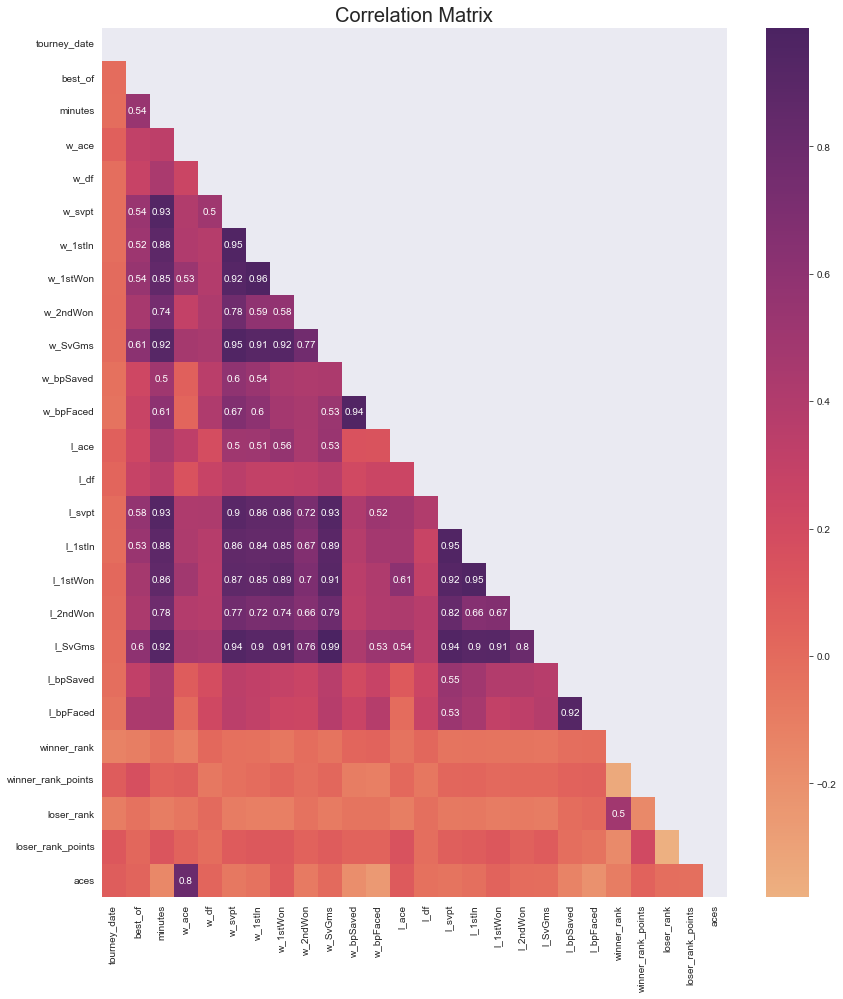

In [32]:
mask = np.triu(np.ones_like(m_corr, dtype = bool)) # mask the upper triangle, easier to read
f, ax = plt.subplots(figsize = (14, 16))

sns.heatmap(m_corr, mask = mask, cmap = 'flare', annot = True, annot_kws = {"size": 10})

for t in ax.texts:
    if float(t.get_text()) >= 0.5:
        t.set_text(t.get_text()) # if the value is greater than 0.5 then I set the text 
    elif float(t.get_text()) < -0.5: # if the value is smaller than -0.5 then I set the text 
        t.set_text(t.get_text())
    else:
        t.set_text("") # if not it sets an empty text

plt.title('Correlation Matrix', fontsize = 20)
plt.show()

## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 4</SPAN>

<SPAN style=color:#1F618D>Continuing with the sports theme data, select an attribute and calculate the geometric mean and harmonic mean.</SPAN>

<u>**Geometric Mean:**</u> is a special type of average where we multiply the numbers together and then take a square root (for two numbers), cube root (for three numbers) etc. Is useful when we want to compare things with very different properties.


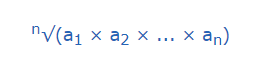

In [33]:
geom_mean = stats.gmean(atp_2018.loc[:,'w_1stWon'])
print(f'The geometric mean is: {round(geom_mean,2)}')

The geometric mean is: 35.37


<u>**Harmonic Mean:**</u> the reciprocal of the average of the reciprocals. The harmonic mean is little influenced by the existence of certain values much larger than the set of others, being instead sensitive to values much smaller than the set.

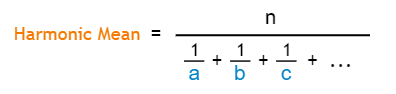

In [34]:
harm_mean = statistics.harmonic_mean(atp_2018['w_1stWon'])
print(f'The harmonic mean is: {round(harm_mean, 2)}')


The harmonic mean is: 33.04
